In [11]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

In [3]:
#Dataset:
#8 variables de entrada y 1 de salida (1 y 0)
#El modelo deberá aprender a relacionar las filas de inputs a la salida
#Las variables de entrada (X) son
#1-Número de veces embarazada
#2-Concentración de glucosa
#3-Presión Diastólica
#4-Grosor de piel en tríceps
#5-Suero de insulina
#6-Indice de grasa
#7-Diabetes pedigree
#8-Edad

#La variable de salida (Y):
#Clase (0 y 1)

In [4]:
#Cargamos el dataset
dataset=loadtxt('pima-indians-diabetes.data.csv',delimiter=',')
#separamos en entradas y salida:

X=dataset[:,0:8] #IMPORTANTE 0:8 toma del índice 0 al 7 -> 0:n = 0,1,...,n-1
y=dataset[:,8]


# Modelo Keras (Sequential)

In [5]:
model= Sequential ()
#primera capa (aquí se definen DOS CAPAS: la de entrada con input_dim y la primera capa oculta)
model.add(Dense(12,input_dim=8,activation='relu'))  #DENSE = Fully connected, 8 variables de entrada 
                                                    #y fc de activación ReLU
#segunda capa
model.add(Dense(8,activation='relu'))
#tercera capa
model.add(Dense(1,activation='sigmoid'))

#Una vez definida la arquitectura COMPILAMOS el modelo
#para esto es necesario definir optimizador, función de costos y metricas, entre otras

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#Compilado el modelo se puede entrenar:
#se utiliza la función fit()
#El entrenamiento ocurre por épocas y cada época se divide en batches:
#-Época: una pasada por todas las filas (ejemplos) del dataset (en general nros grandes como 200, 500, 1000)
#-Batch: cantidad de muestras u observaciones evaluadas antes de la actualización de los pesos

model.fit(X,y,epochs=150,batch_size=10)


Epoch 1/150
768/768 [==============================] - 0s 491us/step - loss: 4.2954 - acc: 0.4818
Epoch 2/150
768/768 [==============================] - 0s 246us/step - loss: 0.9568 - acc: 0.5768
Epoch 3/150
768/768 [==============================] - 0s 248us/step - loss: 0.7225 - acc: 0.6328
Epoch 4/150
768/768 [==============================] - 0s 249us/step - loss: 0.6602 - acc: 0.6458
Epoch 5/150
768/768 [==============================] - 0s 251us/step - loss: 0.6440 - acc: 0.6758
Epoch 6/150
768/768 [==============================] - 0s 246us/step - loss: 0.6117 - acc: 0.6758
Epoch 7/150
768/768 [==============================] - 0s 249us/step - loss: 0.6089 - acc: 0.6875
Epoch 8/150
768/768 [==============================] - 0s 242us/step - loss: 0.6046 - acc: 0.6797
Epoch 9/150
768/768 [==============================] - 0s 218us/step - loss: 0.5765 - acc: 0.7109
Epoch 10/150
768/768 [==============================] - 0s 227us/step - loss: 0.5942 - acc: 0.6771
Epoch 11/150
768/76

768/768 [==============================] - 0s 219us/step - loss: 0.5144 - acc: 0.7604
Epoch 84/150
768/768 [==============================] - 0s 221us/step - loss: 0.5037 - acc: 0.7578
Epoch 85/150
768/768 [==============================] - 0s 216us/step - loss: 0.5238 - acc: 0.7539
Epoch 86/150
768/768 [==============================] - 0s 219us/step - loss: 0.5097 - acc: 0.7513
Epoch 87/150
768/768 [==============================] - 0s 230us/step - loss: 0.5037 - acc: 0.7487
Epoch 88/150
768/768 [==============================] - 0s 223us/step - loss: 0.5163 - acc: 0.7461
Epoch 89/150
768/768 [==============================] - 0s 213us/step - loss: 0.5203 - acc: 0.7526
Epoch 90/150
768/768 [==============================] - 0s 211us/step - loss: 0.5074 - acc: 0.7526
Epoch 91/150
768/768 [==============================] - 0s 239us/step - loss: 0.4958 - acc: 0.7682
Epoch 92/150
768/768 [==============================] - 0s 219us/step - loss: 0.5171 - acc: 0.7409
Epoch 93/150
768/768 [=

In [6]:
#podemos evaluar el modelo (notar que se evalúa con el mismo cjto de entrenamiento)
_,accuracy=model.evaluate(X,y)
print('Accuracy:%2f'%(accuracy*100))

768/768 [==============================] - 0s 60us/step
Accuracy:78.385417


In [7]:
#también se pueden hacer predicciones
predictions=model.predict(X)
#redondear predicciones = 1, 0
rounded=[round(x[0])for x in predictions]


In [57]:
#Ahora con sets para entrenamiento y test
X_train=X[:round(len(X)*2/3)]
X_test=X[round(len(X)*2/3):]
y_train=y[:round(len(y)*2/3)]
y_test=y[round(len(y)*2/3):]


#agregamos early stopping para evitar overfitting
from keras.callbacks import EarlyStopping as ES
es=ES(monitor='val_loss',mode='min',verbose=1,patience=50)

historial=model.fit(X_train,y_train,epochs=300,batch_size=7,validation_split=0.3,callbacks=[es])

#model.evaluate(X_test,y_test) entrega una tupla [loss_value metrics_valiue]

_,accuracy=model.evaluate(X_test,y_test)
print('Accuracy:%2f'%(accuracy*100))

Train on 358 samples, validate on 154 samples
Epoch 1/300
358/358 [==============================] - 0s 423us/step - loss: 0.3407 - acc: 0.8799 - val_loss: 0.7391 - val_acc: 0.7987
Epoch 2/300
358/358 [==============================] - 0s 419us/step - loss: 0.3363 - acc: 0.8659 - val_loss: 0.7078 - val_acc: 0.7792
Epoch 3/300
358/358 [==============================] - 0s 428us/step - loss: 0.3416 - acc: 0.8771 - val_loss: 0.7143 - val_acc: 0.7922
Epoch 4/300
358/358 [==============================] - 0s 425us/step - loss: 0.3426 - acc: 0.8659 - val_loss: 0.7462 - val_acc: 0.7727
Epoch 5/300
358/358 [==============================] - 0s 443us/step - loss: 0.3388 - acc: 0.8715 - val_loss: 0.7418 - val_acc: 0.7532
Epoch 6/300
358/358 [==============================] - 0s 438us/step - loss: 0.3792 - acc: 0.8547 - val_loss: 0.7092 - val_acc: 0.7597
Epoch 7/300
358/358 [==============================] - 0s 440us/step - loss: 0.3840 - acc: 0.8436 - val_loss: 0.7158 - val_acc: 0.7727
Epoch 8/3

Epoch 61/300
358/358 [==============================] - 0s 413us/step - loss: 0.3287 - acc: 0.8603 - val_loss: 0.8417 - val_acc: 0.7208
Epoch 62/300
358/358 [==============================] - 0s 422us/step - loss: 0.3477 - acc: 0.8659 - val_loss: 0.8261 - val_acc: 0.7338
Epoch 63/300
358/358 [==============================] - 0s 375us/step - loss: 0.3248 - acc: 0.8743 - val_loss: 0.7457 - val_acc: 0.7857
Epoch 64/300
358/358 [==============================] - 0s 399us/step - loss: 0.3420 - acc: 0.8687 - val_loss: 0.7478 - val_acc: 0.7857
Epoch 65/300
358/358 [==============================] - 0s 373us/step - loss: 0.3436 - acc: 0.8575 - val_loss: 0.7583 - val_acc: 0.7922
Epoch 66/300
358/358 [==============================] - 0s 385us/step - loss: 0.3398 - acc: 0.8743 - val_loss: 0.7901 - val_acc: 0.7922
Epoch 67/300
358/358 [==============================] - 0s 404us/step - loss: 0.3449 - acc: 0.8631 - val_loss: 0.7812 - val_acc: 0.7857
Epoch 68/300
358/358 [==========================

In [9]:
#Para guardar modelo

NN_tutorial=model.to_json() #genera modelo json de la red (sólo arquitectura)

archivo_json=open('model.json','w') #se abre un archivo .json en blanco
archivo_json.write(NN_tutorial) #se almacena la arquitectura en el archivo

model.save_weights('model.h5') #se almacenan los pesos



In [45]:
#Para cargar modelo

archivo_json=open('model.json','r') #abre archivo donde se almacenó la red

modelo_cargado=archivo_json.read() #se lee archivo
archivo_json.close()

NN_de_archivo=model_from_json(modelo_cargado) #se crea la arquitectura

#después se cargan los pesos

NN_de_archivo.load_weights('model.h5')

#Hay que compilar el modelo después

NN_de_archivo.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#evaluamos para ver que sea el mismo

_,accuracy=NN_de_archivo.evaluate(X_test,y_test)
print('Accuracy:%2f'%(accuracy*100))

256/256 [==============================] - 0s 869us/step
Accuracy:76.562500


# Sumariar información del modelo

In [37]:
print(model.summary())
#Shape es la cantidad de neuronas en la capa, parámetros son los pesos, 
#para la primera capa son 12*8 (neuronas * entradas) conexiones + 12 bias

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


# Visualizar modelo

In [42]:
#Se utiliza la función plot_model:
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

# Mostrar historial de entrenamiento del modelo

<function matplotlib.pyplot.show(*args, **kw)>

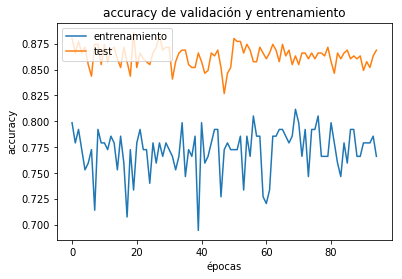

In [58]:
#para usar esta función se debe poner history= antes del fit
import matplotlib.pyplot as plt

#print(historial.history.keys())
#entrega
#dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])


plt.plot(historial.history['val_acc'])
plt.plot(historial.history['acc'])
plt.title('accuracy de validación y entrenamiento')
plt.xlabel('épocas')
plt.ylabel('accuracy')
plt.legend(['entrenamiento','test'],loc='upper left')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

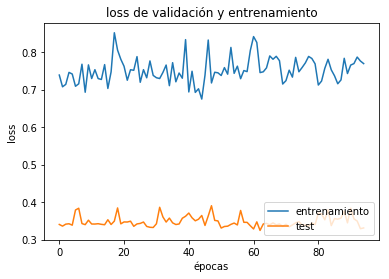

In [59]:
plt.plot(historial.history['val_loss'])
plt.plot(historial.history['loss'])
plt.title('loss de validación y entrenamiento')
plt.xlabel('épocas')
plt.ylabel('loss')
plt.legend(['entrenamiento','test'],loc='lower right')
plt.show
